# Import Package

In [1]:
import psycopg2
import pandas as pd

from sqlalchemy import create_engine, text as sql_text

# Load Connecting

In [2]:
# Connection details
host_p='trumpet.db.elephantsql.com'
database_p='jnztjshy'
user_p='jnztjshy'
password_p='Mka04XKZDONkzYgg2EOwIp-Sr7RK0jnu'
port_p = 5432

# #establishing the connection
conn = psycopg2.connect(database=database_p, user=user_p, password=password_p, host=host_p, port=port_p)
#Creating a cursor object using the cursor() method
conn.autocommit = True
cursor = conn.cursor()

connection_string = f'postgresql://{user_p}:{password_p}@{host_p}:{port_p}/{database_p}'
engine_postgresql = create_engine(connection_string)

# Soal 1

Soal Filter : Tampilkan data customer dengan kriteria atau filter<br>


*   age harus di bawah rata-rata age seluruh customer, misal rata-rata age adalah 20, maka filter pertama menampilkan data dengan age < 20. **NOTE : cari dulu rata-rata age dengan query/sql**
*   gender hanya M (male)
*   tahun kelahiran harus di bawah 1990-01-01




In [24]:
q='''
SELECT count(*)
FROM dim_customer 
'''

#cara 1
df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,count
0,1360


In [23]:
q='''
SELECT count(*)
FROM dim_customer 
WHERE gender = 'M'
'''

#cara 1
df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,count
0,665


In [25]:
q='''
SELECT count(*)
FROM dim_customer 
WHERE age < (
    SELECT AVG(age)
    FROM dim_customer)
AND gender = 'F'
AND birthdate < '1990-01-01'
'''

#cara 1
df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,count
0,169


In [8]:
q='''
SELECT *
FROM dim_customer 
WHERE age < (
    SELECT AVG(age)
    FROM dim_customer)
AND gender = 'M'
AND birthdate < '1990-01-01'
'''

#cara 1
df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,customer_id,geography_id,customer_name,birthdate,maritalstatus,gender,datefirstpurchase,age,grouping_age
0,11013,543,Ian Jenkins,1988-08-06,M,M,2018-10-15,34,Group 21 - 40
1,11094,33,Cedric Ma,1982-04-01,S,M,2018-10-09,40,Group 21 - 40
2,11095,13,Chad Kumar,1982-09-01,S,M,2016-10-02,40,Group 21 - 40
3,11096,12,Andrés Anand,1982-08-10,M,M,2016-10-12,40,Group 21 - 40
4,11104,23,Edgar Sara,1984-03-11,M,M,2016-11-04,38,Group 21 - 40
...,...,...,...,...,...,...,...,...,...
149,23539,37,Darren Munoz,1983-01-04,S,M,2018-02-18,39,Group 21 - 40
150,25108,19,Gary Gill,1988-11-06,M,M,2018-04-02,34,Group 21 - 40
151,25228,12,Brad Ashe,1984-10-14,S,M,2018-06-25,38,Group 21 - 40
152,26342,343,Eduardo Griffin,1989-08-16,S,M,2017-10-18,33,Group 21 - 40


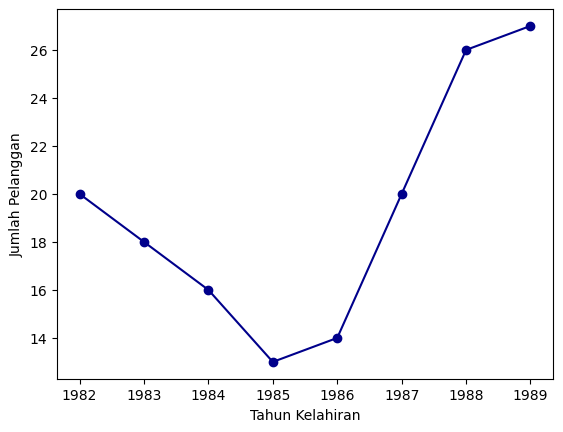

In [20]:
# Jumlah Pelanggan Berdasarkan Tahun Kelahiran

import matplotlib.pyplot as plt
import pandas as pd

# Mengonversi kolom birthdate ke format datetime
df['birthdate'] = pd.to_datetime(df['birthdate'])

# Ekstrak tahun kelahiran
df['year_of_birth'] = df['birthdate'].dt.year

# Menghitung jumlah kelahiran per tahun
births_per_year = df['year_of_birth'].value_counts().sort_index()

# Membuat line chart
plt.plot(births_per_year.index, births_per_year.values, marker='o', linestyle='-', color='darkblue')

# Menambahkan judul dan label
plt.xlabel('Tahun Kelahiran')
plt.ylabel('Jumlah Pelanggan')

# Menampilkan plot
plt.show()


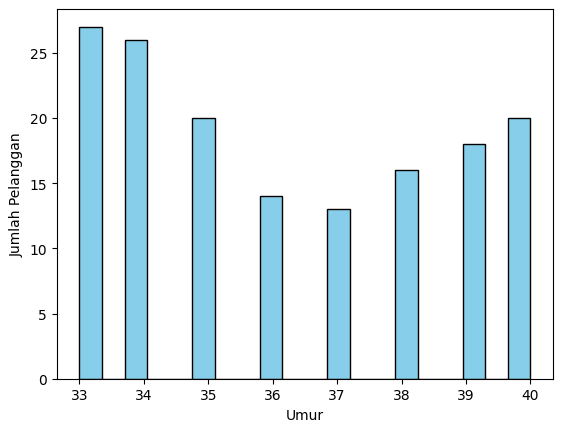

In [18]:
# Histogram Umur Pelanggan Pria yang lahir sebelum 1990

import matplotlib.pyplot as plt

# Visualisasi histogram untuk kolom umur
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')

# Menambahkan judul dan label
plt.xlabel('Umur')
plt.ylabel('Jumlah Pelanggan')

# Menampilkan plot
plt.show()

# Soal 2

Buat lah Query dengan tampilan data seperti di bawah ini

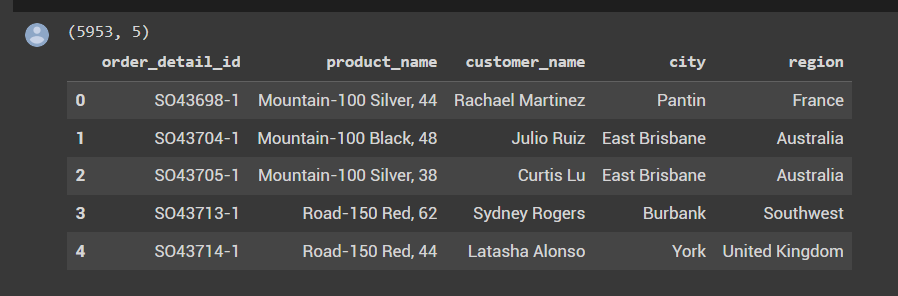

In [27]:
q='''
SELECT fs.order_detail_id, dp.product_name, dc.customer_name, dg.city, dt.region
FROM fact_sales fs

JOIN dim_product dp ON dp.product_id = fs.product_id
JOIN dim_customer dc ON dc.customer_id = fs.customer_id
JOIN dim_geography dg ON dg.geography_id = dc.geography_id
JOIN dim_territory dt ON dt.territory_id = fs.territory_id


'''

#cara 1
df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,order_detail_id,product_name,customer_name,city,region
0,SO43698-1,"Mountain-100 Silver, 44",Rachael Martinez,Pantin,France
1,SO43704-1,"Mountain-100 Black, 48",Julio Ruiz,East Brisbane,Australia
2,SO43705-1,"Mountain-100 Silver, 38",Curtis Lu,East Brisbane,Australia
3,SO43713-1,"Road-150 Red, 62",Sydney Rogers,Burbank,Southwest
4,SO43714-1,"Road-150 Red, 44",Latasha Alonso,York,United Kingdom
...,...,...,...,...,...
5948,SO74092-4,"Sport-100 Helmet, Blue",Emmanuel Garcia,Milton Keynes,United Kingdom
5949,SO74092-3,Road Bottle Cage,Emmanuel Garcia,Milton Keynes,United Kingdom
5950,SO74092-2,Water Bottle - 30 oz.,Emmanuel Garcia,Milton Keynes,United Kingdom
5951,SO74092-1,"Touring-1000 Blue, 54",Emmanuel Garcia,Milton Keynes,United Kingdom


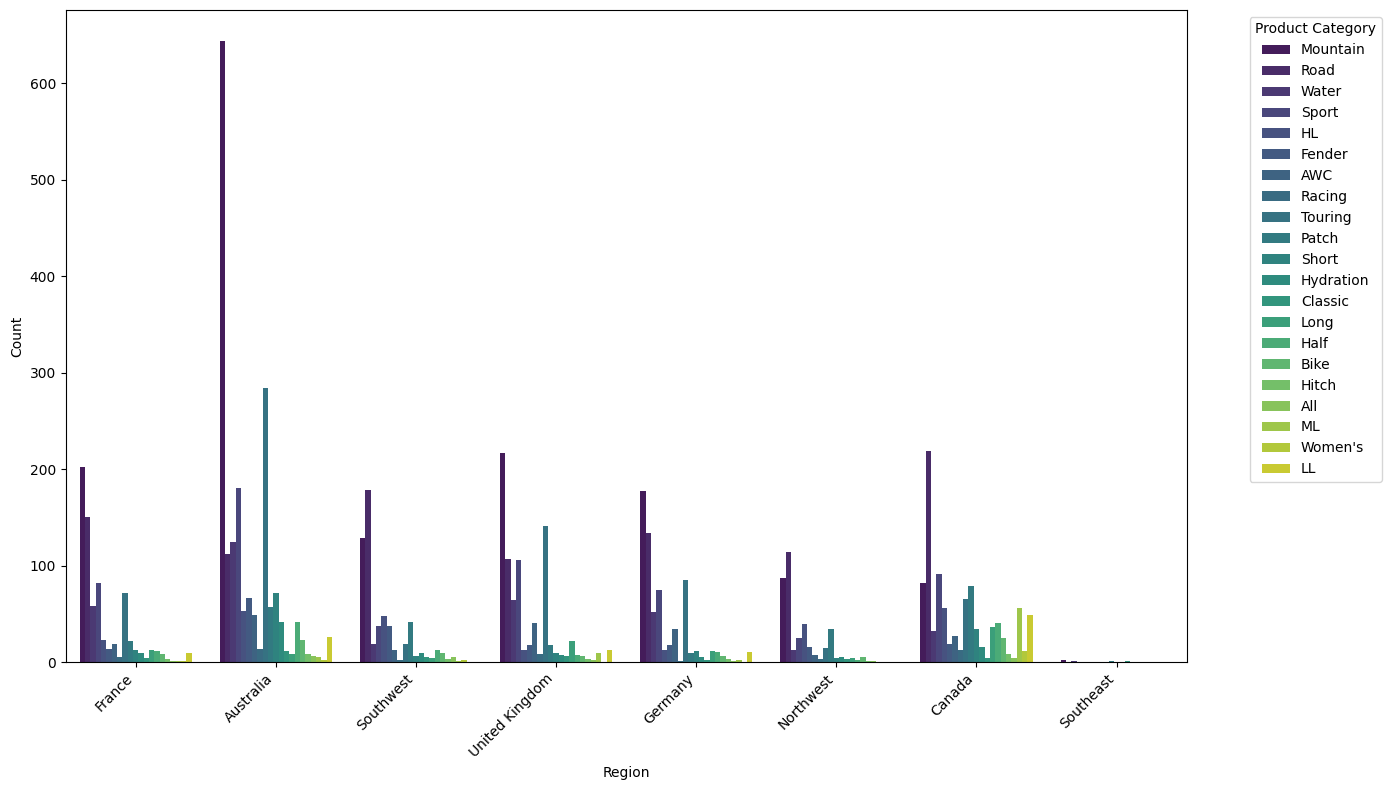

In [58]:
# Distribution of Product Categories by Region

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the query results
df['product_category'] = df['product_name'].apply(lambda x: x.split('-')[0].split()[0] if '-' in x else x.split()[0])

plt.figure(figsize=(14, 8))

# Create a count plot using seaborn
sns.countplot(x='region', hue='product_category', data=df, palette='viridis')

plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout for better display
plt.show()


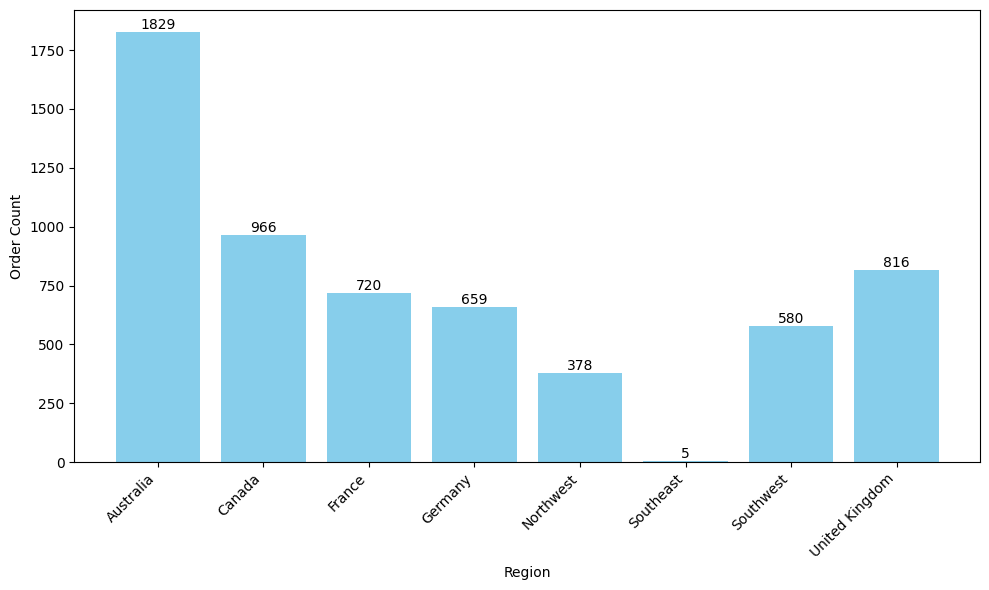

In [60]:
# Order count by region

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the query results
df_grouped = df.groupby('region')['order_detail_id'].count().reset_index()

# Plotting the map with values on top of each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(df_grouped['region'], df_grouped['order_detail_id'], color='skyblue')

# Adding values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Region')
plt.ylabel('Order Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjust layout for better display
plt.show()

# Soal 3

Tampilkan omset rata-rata perbulan dengan order month descending

In [11]:
q='''
SELECT date_part('month', date(order_date)) AS month,
       AVG(omset) AS avg_omset
FROM fact_sales
GROUP BY 1
ORDER BY 1 asc

'''

#cara 1
df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,month,avg_omset
0,1.0,4.422646e+06
1,2.0,4.764898e+06
2,3.0,9.767824e+06
3,4.0,6.601118e+06
4,5.0,6.011666e+06
5,6.0,5.888909e+06
6,7.0,7.129074e+06
7,8.0,4.966883e+06
8,9.0,4.603846e+06
9,10.0,5.012182e+06


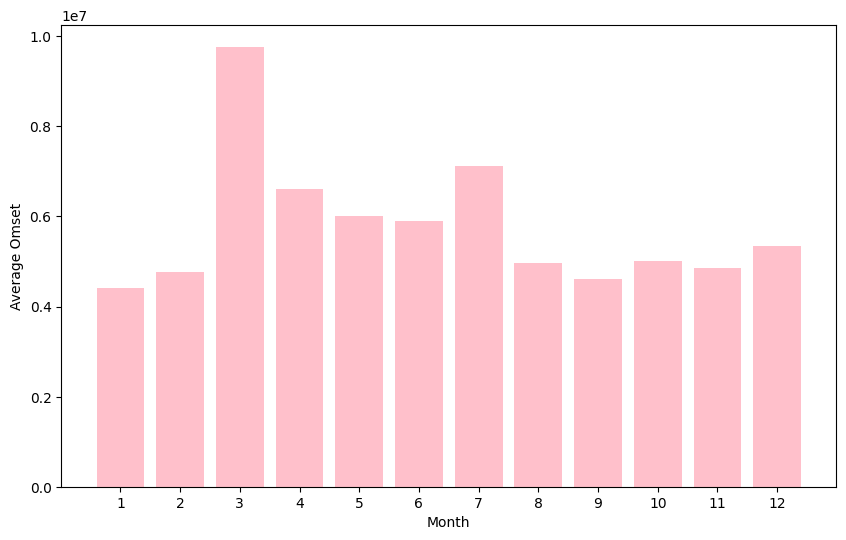

In [78]:
# Average Omset by Month

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the query results
df['avg_omset'] = pd.to_numeric(df['avg_omset'], errors='coerce')
df['month'] = df['month'].astype(int)

# Plotting the histogram with explicit x-axis ticks
plt.figure(figsize=(10, 6))
plt.bar(df['month'], df['avg_omset'], color='pink')
plt.xlabel('Month')
plt.ylabel('Average Omset')

# Explicitly set x-axis ticks for all months (1 to 12)
plt.xticks(range(1, 13))

plt.show()

# Soal 4

Tampilkan data total omset antara laki-laki vs wanita


*   age harus lebih 30 tahun
*   category product adalah Bikes



In [5]:
q='''
SELECT 
       SUM(omset) AS sum_omset
FROM fact_sales AS fs

JOIN dim_customer dc ON dc.customer_id = fs.customer_id
JOIN dim_product dp ON dp.product_id = fs.product_id


'''
#WHERE dc.age >30
#AND dp.category = 'Bikes'

#cara 1
df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,sum_omset
0,3.239957e+10


In [6]:
import pandas as pd

# Assuming df is your DataFrame with the query results
df['sum_omset'] = pd.to_numeric(df['sum_omset'], errors='coerce')

# Convert the 'sum_omset' column to currency format (Rupiah)
df['sum_omset'] = df['sum_omset'].apply(lambda x: 'Rp {:,.2f}'.format(x))

# Print the DataFrame with 'sum_omset' in Rupiah format
df

,sum_omset
0,"Rp 32,399,570,000.00"


In [3]:
q='''
SELECT dc.gender,
       SUM(omset) AS sum_omset
FROM fact_sales AS fs

JOIN dim_customer dc ON dc.customer_id = fs.customer_id
JOIN dim_product dp ON dp.product_id = fs.product_id

GROUP BY 1
'''
#WHERE dc.age >30
#AND dp.category = 'Bikes'

#cara 1
df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,gender,sum_omset
0,M,1.548757e+10
1,F,1.691185e+10


In [4]:
import pandas as pd

# Assuming df is your DataFrame with the query results
df['sum_omset'] = pd.to_numeric(df['sum_omset'], errors='coerce')

# Convert the 'sum_omset' column to currency format (Rupiah)
df['sum_omset'] = df['sum_omset'].apply(lambda x: 'Rp {:,.2f}'.format(x))

# Print the DataFrame with 'sum_omset' in Rupiah format
df

,gender,sum_omset
0,M,"Rp 15,487,573,000.00"
1,F,"Rp 16,911,850,000.00"
